<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:12px 26px; border-radius:15px; font-size:24px;'><B>Vaccine Predictor </B>- Time Series Prediction</div>
<a href="https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial">Kaggle Tutorial - Time Series Prediction</a>

In [90]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import datetime 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

from vaccine_predictor.params import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
practice_code = "E87750"

In [92]:
data = pd.read_csv(f'{RAW_DATA}/influenza_predictor2.csv')
display(data.head())
display(data.shape)

,Vaccination type,Event date,Patient ID,Date of birth,Event done at ID,Patient Count
0,Influenza Vaccine 1,21-Oct-1993,19579730,08-Feb-2028,E87750,1
1,Influenza Vaccine 1,22-Nov-1996,19579289,13-May-1937,E87750,1
2,Influenza Vaccine 1,31-Oct-1997,17412404,30-Dec-1982,E87750,1
3,Influenza Vaccine 1,26-Nov-1997,17412911,27-Feb-1950,E87750,1
4,Influenza Vaccine 1,11-Dec-1997,59039995,06-Jun-1993,NaN,1


(6312, 6)

In [93]:
data.drop(columns='Patient Count', inplace=True)
data.columns = ["vaccine", "date", "patient_id", "dob", "location"]
data.fillna(practice_code, inplace=True)
data.isna().sum()

vaccine       0
date          0
patient_id    0
dob           0
location      0
dtype: int64

In [94]:
data.head()

,vaccine,date,patient_id,dob,location
0,Influenza Vaccine 1,21-Oct-1993,19579730,08-Feb-2028,E87750
1,Influenza Vaccine 1,22-Nov-1996,19579289,13-May-1937,E87750
2,Influenza Vaccine 1,31-Oct-1997,17412404,30-Dec-1982,E87750
3,Influenza Vaccine 1,26-Nov-1997,17412911,27-Feb-1950,E87750
4,Influenza Vaccine 1,11-Dec-1997,59039995,06-Jun-1993,E87750


In [95]:
data['date'] = pd.to_datetime(data['date'], format="%d-%b-%Y")
data['dob'] = pd.to_datetime(data['dob'], format="%d-%b-%Y")

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   vaccine     6312 non-null   object        
 1   date        6312 non-null   datetime64[ns]
 2   patient_id  6312 non-null   int64         
 3   dob         6312 non-null   datetime64[ns]
 4   location    6312 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 246.7+ KB


In [97]:
df = data[data['location'] == practice_code]

In [98]:
df.shape

(4938, 5)

In [99]:
df['age_at_vaccine'] = df['date'].dt.year - df['dob'].dt.year

/var/folders/0l/kzz8m3n52cs0d9lhcjh_yxqm0000gn/T/ipykernel_26333/3140029958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_at_vaccine'] = df['date'].dt.year - df['dob'].dt.year


In [100]:
df = df[df['age_at_vaccine']> 0]

In [101]:
#df = df[df['date'] >= '2019-09-01']

In [103]:
df.shape

(4891, 6)

In [104]:
df.head()

,vaccine,date,patient_id,dob,location,age_at_vaccine
1,Influenza Vaccine 1,1996-11-22,19579289,1937-05-13,E87750,59
2,Influenza Vaccine 1,1997-10-31,17412404,1982-12-30,E87750,15
3,Influenza Vaccine 1,1997-11-26,17412911,1950-02-27,E87750,47
4,Influenza Vaccine 1,1997-12-11,59039995,1993-06-06,E87750,4
5,Influenza Vaccine 1,1998-10-07,19579079,1938-02-03,E87750,60


<Axes: xlabel='age_at_vaccine', ylabel='Count'>

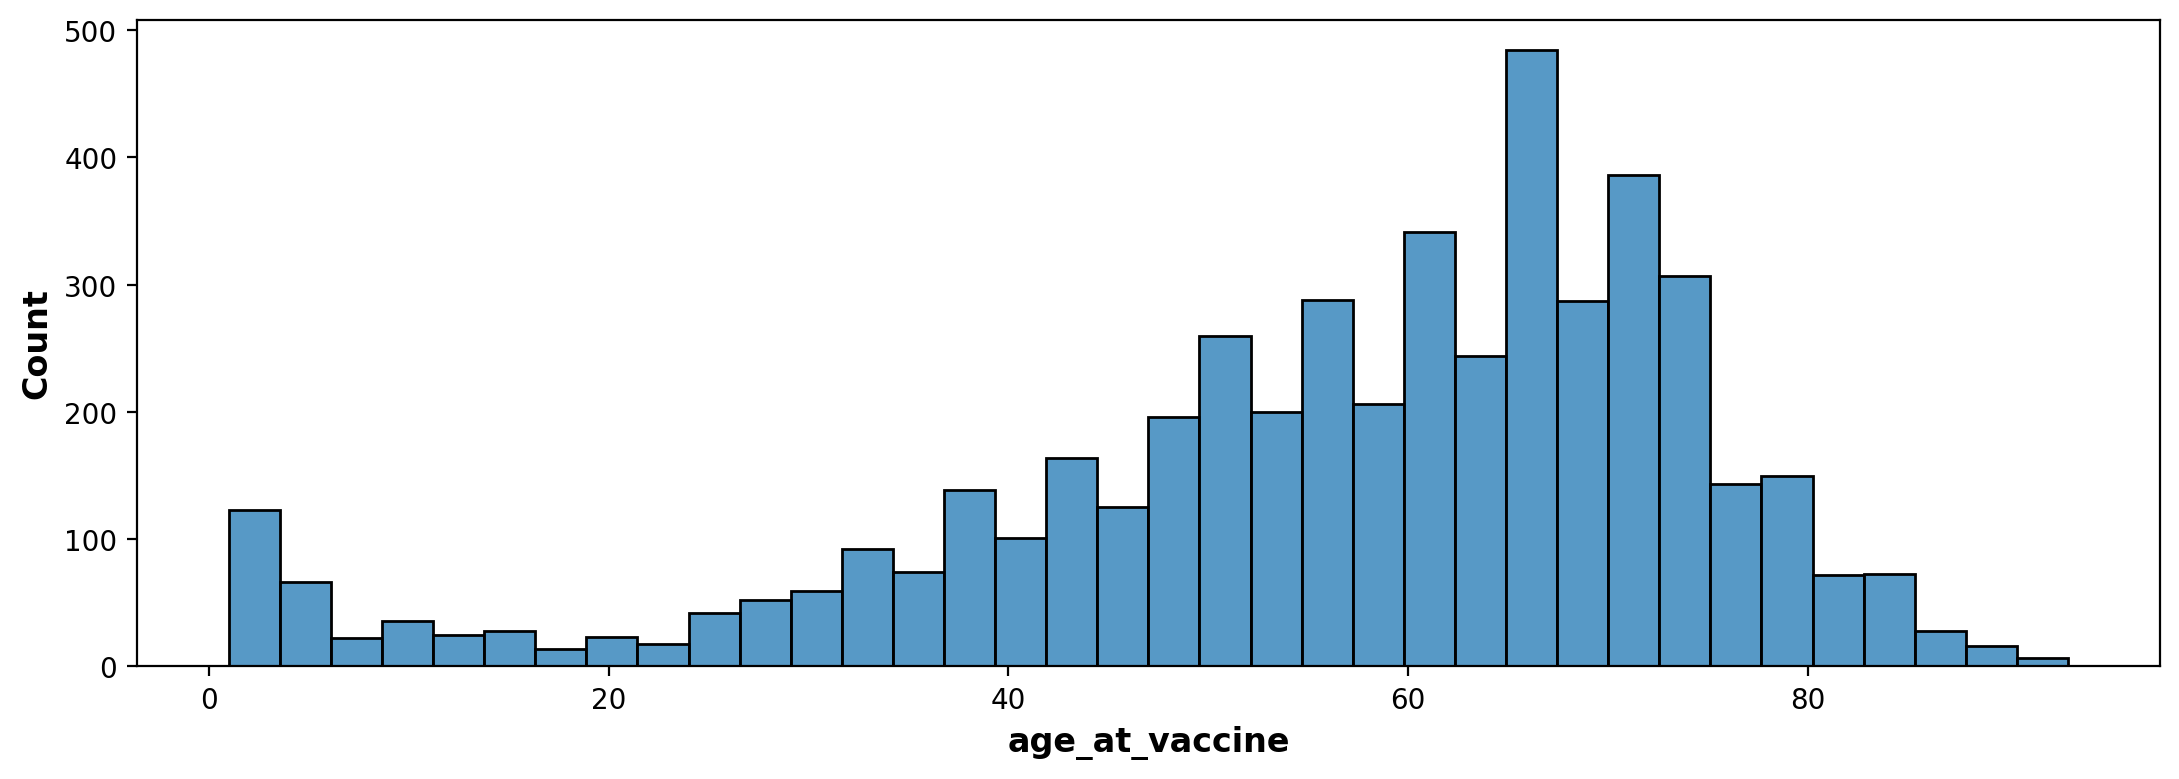

In [105]:
sns.histplot(data=df, x='age_at_vaccine')

In [106]:
def to_timeseries(df, column, time_period="D"):
    # Resample and count occurrences in each period
    m_count = df.resample(time_period, on=column).size()

    # Convert to DataFrame
    m_count_df = m_count.reset_index()

    # Rename columns
    m_count_df.columns = ["date", "count"]

    return m_count_df

ts = to_timeseries(df, 'date', "M")
ts.set_index('date', inplace=True)
ts.head()

In [108]:
ts.set_index('date', inplace=True)

In [109]:
ts.head()

,count
date,
1993-10-31,2
1993-11-30,3
1993-12-31,0
1994-01-31,0
1994-02-28,0


<Axes: xlabel='date', ylabel='count'>

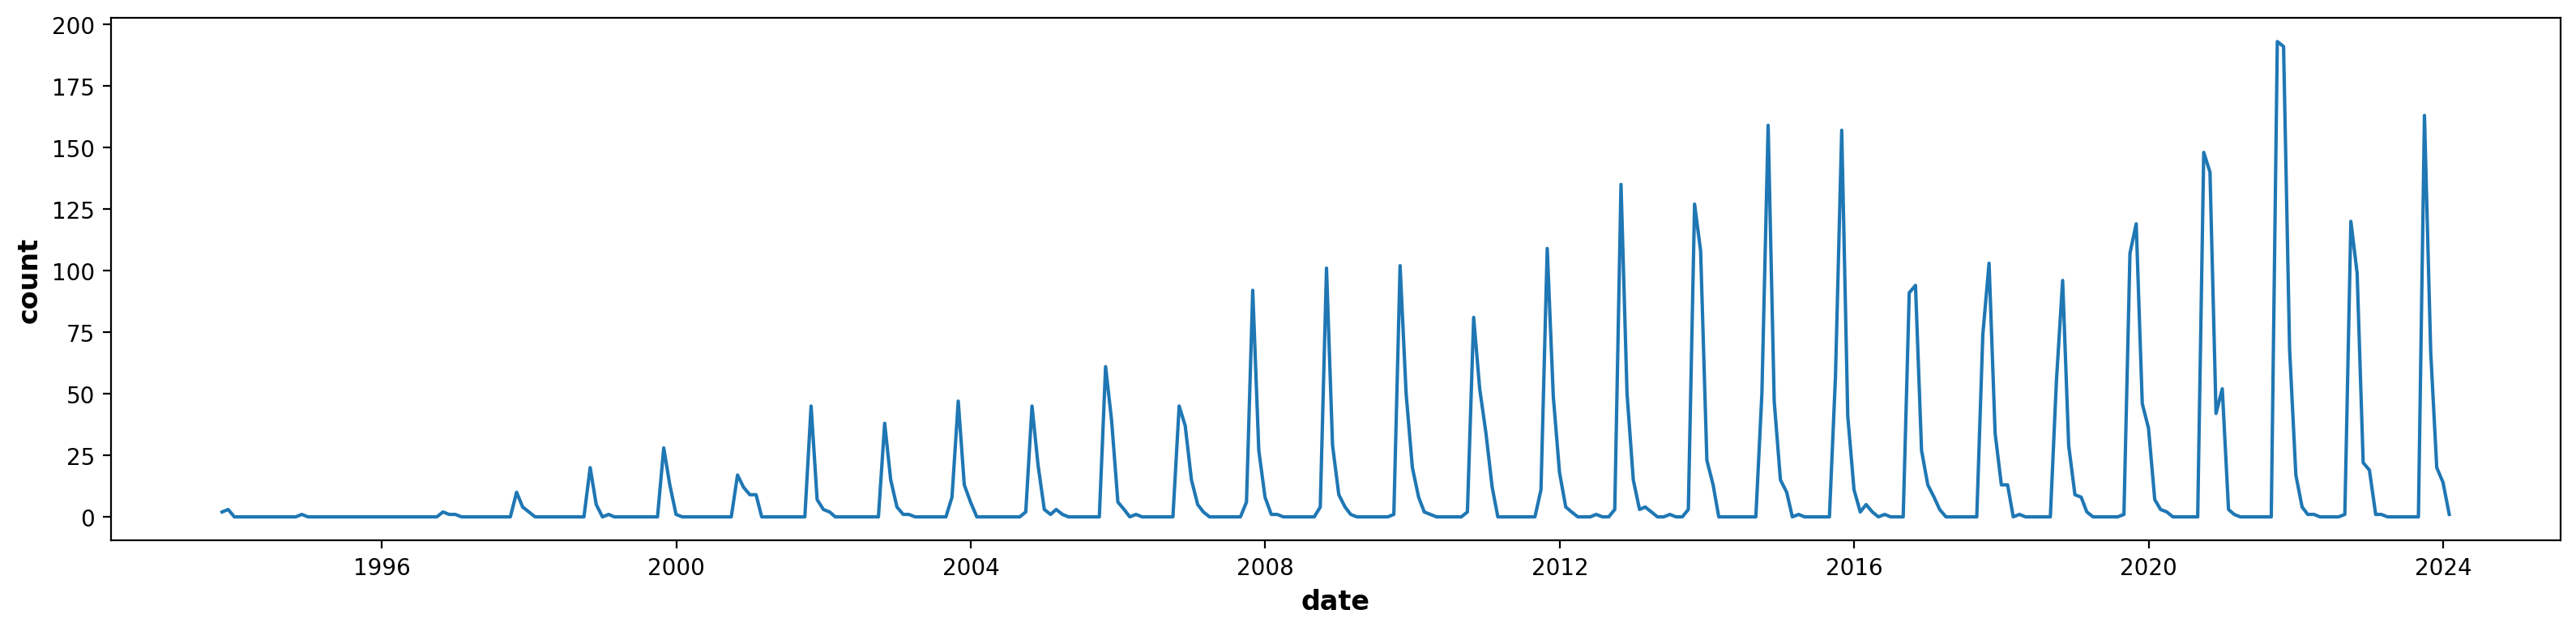

In [110]:
plt.figure(figsize=(16,4))
sns.lineplot(data=ts, x=ts.index, y='count')

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

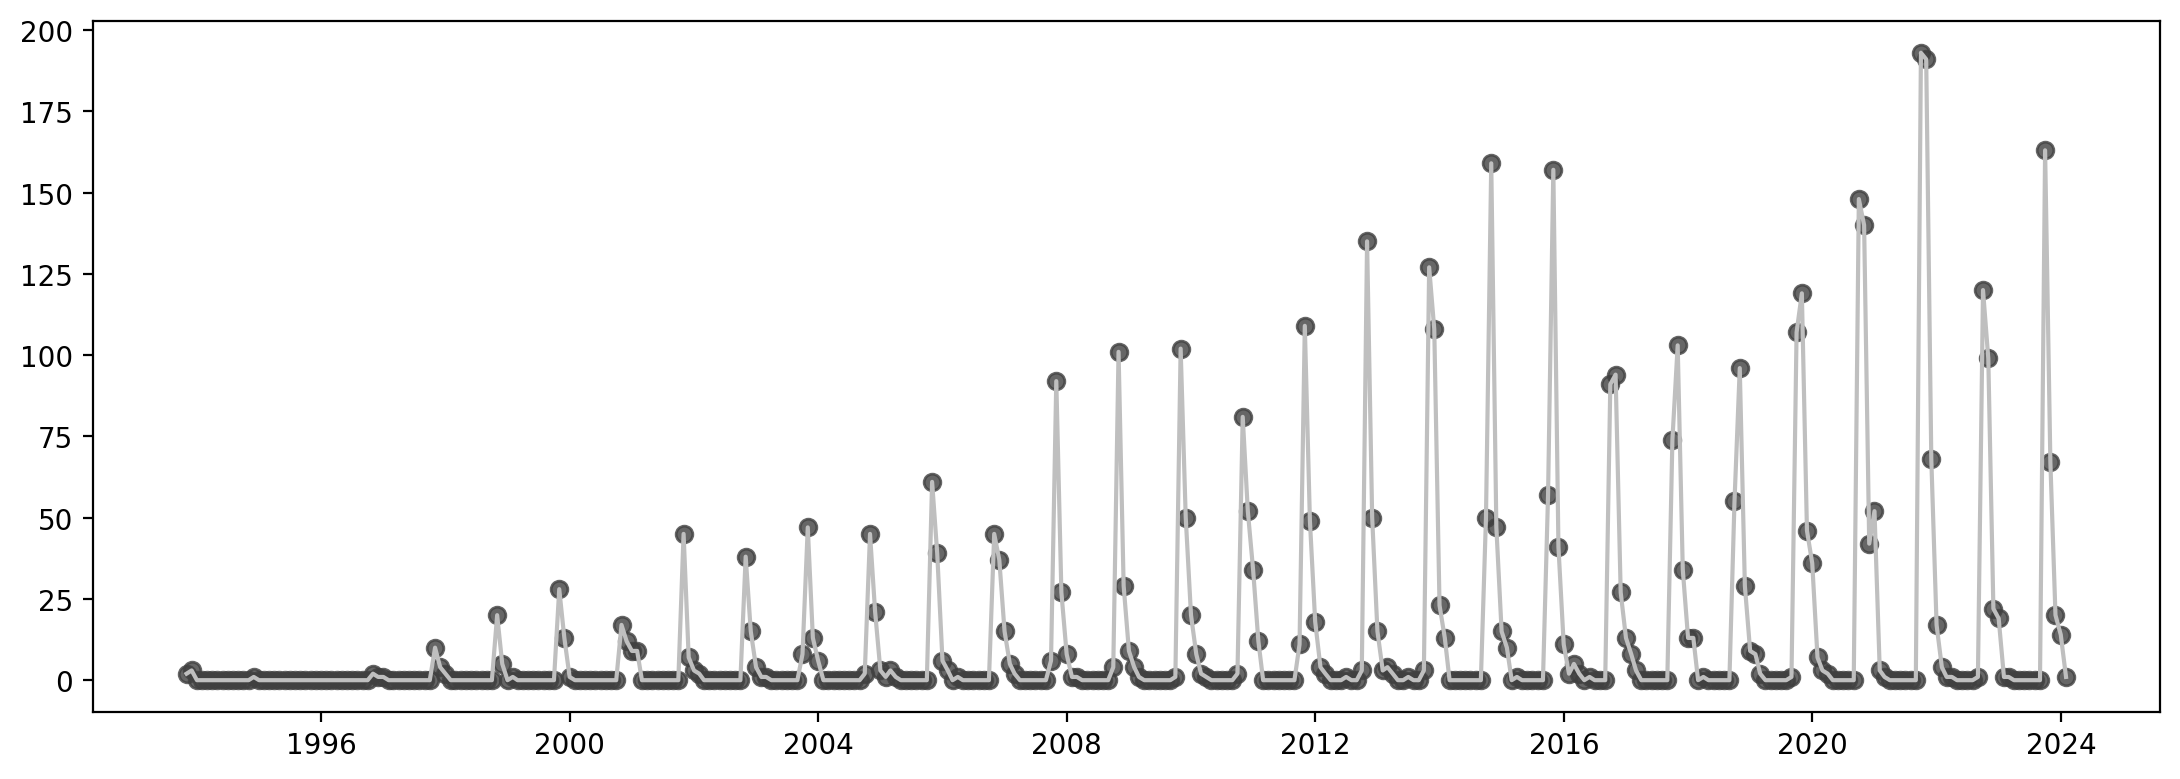

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

fig, ax = plt.subplots()
ax.plot(ts.index, 'count', data=ts, color='0.75')
ax = sns.regplot(x=ts.index, y='count', data=ts, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Vaccinations');

# Lag Features

In [22]:
ts['Lag_1'] = ts['count'].shift(1)
ts = ts.reindex(columns=['count', 'Lag_1'])

ts.head()

,count,Lag_1
date,,
2000-10-31,17,NaN
2000-11-30,12,17.0
2000-12-31,9,12.0
2001-01-31,9,9.0
2001-02-28,0,9.0


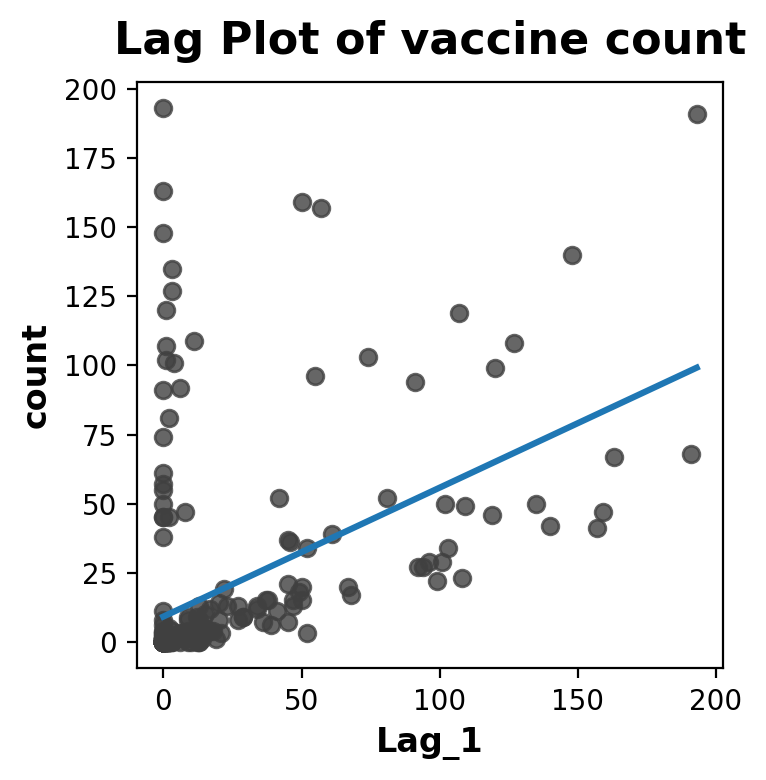

In [23]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='count', data=ts, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of vaccine count');

In [24]:
df = ts.copy()

In [25]:
df

,count,Lag_1
date,,
2000-10-31,17,NaN
2000-11-30,12,17.0
2000-12-31,9,12.0
2001-01-31,9,9.0
2001-02-28,0,9.0
2001-03-31,0,0.0
2001-04-30,0,0.0
2001-05-31,0,0.0
2001-06-30,0,0.0


In [26]:
# Let's keep the last 40% of the counts out for testing purposes 
train_size = 0.5
index = round(train_size*df.shape[0])
df_train = df.iloc[:index]
df_test = df.iloc[index:]

In [27]:
y_pred = df_test.shift(1)
y_pred

,count,Lag_1
date,,
2012-06-30,NaN,NaN
2012-07-31,1.0,0.0
2012-08-31,0.0,1.0
2012-09-30,0.0,0.0
2012-10-31,3.0,0.0
2012-11-30,135.0,3.0
2012-12-31,50.0,135.0
2013-01-31,15.0,50.0
2013-02-28,3.0,15.0


In [28]:
from sklearn.metrics import r2_score

y_pred = df_test.shift(1).dropna()
y_true = df_test[1:]

print(f"R2: {r2_score(y_true, y_pred)}")

R2: -0.07381900587084389


In [29]:
df2 = df.copy(); df2_train = df_train.copy(); df2_test = df_test.copy()

for i in range(1, 13):
    df2_train[f't - {i}'] = df_train['count'].shift(i)
    df2_test[f't - {i}'] = df_test['count'].shift(i)

df2_train.dropna(inplace=True)
df2_test.dropna(inplace=True)

df2_train.head()

,count,Lag_1,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12
date,,,,,,,,,,,,,,
2001-10-31,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,12.0,17.0
2001-11-30,7,45.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,12.0
2001-12-31,3,7.0,7.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0
2002-01-31,2,3.0,3.0,7.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2002-02-28,0,2.0,2.0,3.0,7.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Train Test Split
X2_train = df2_train.drop(columns = ['count'])
y2_train = df2_train['count']
X2_test = df2_test.drop(columns = ['count'])
y2_test = df2_test['count']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(128, 13) (128,) (128, 13) (128,)


R2:  0.8109740665493081


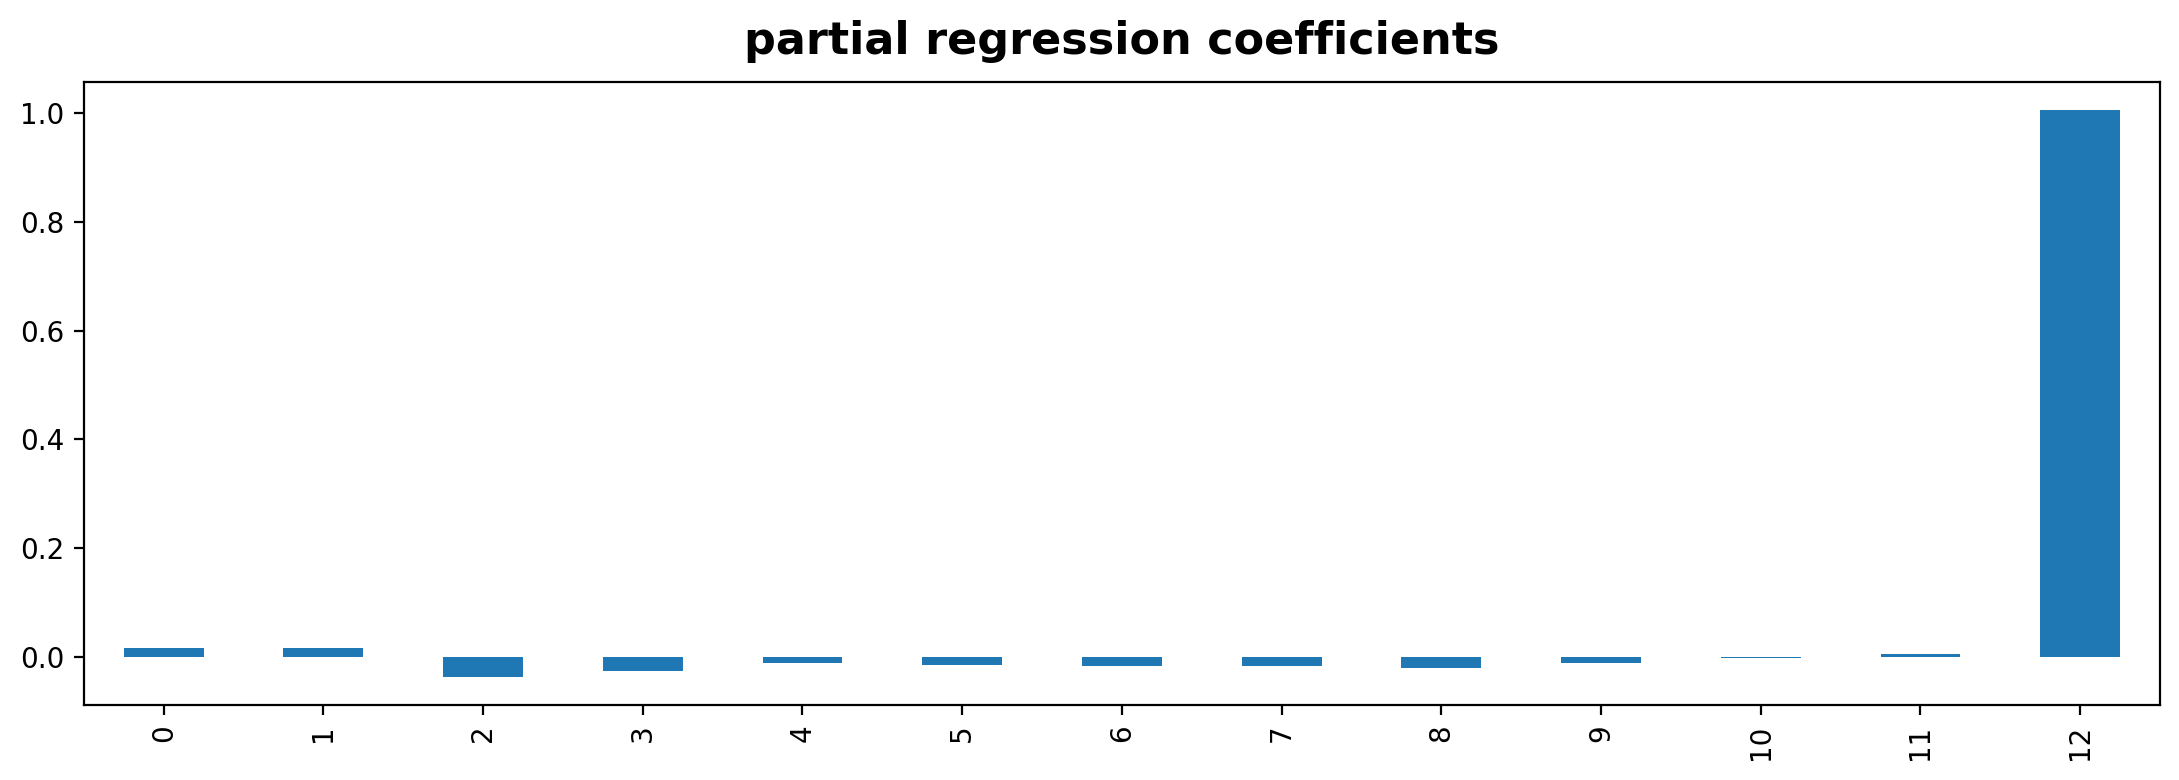

In [31]:
from sklearn.linear_model import LinearRegression
# Predict and measure R2
model = LinearRegression()
model = model.fit(X2_train, y2_train)

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

## Decomposition

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

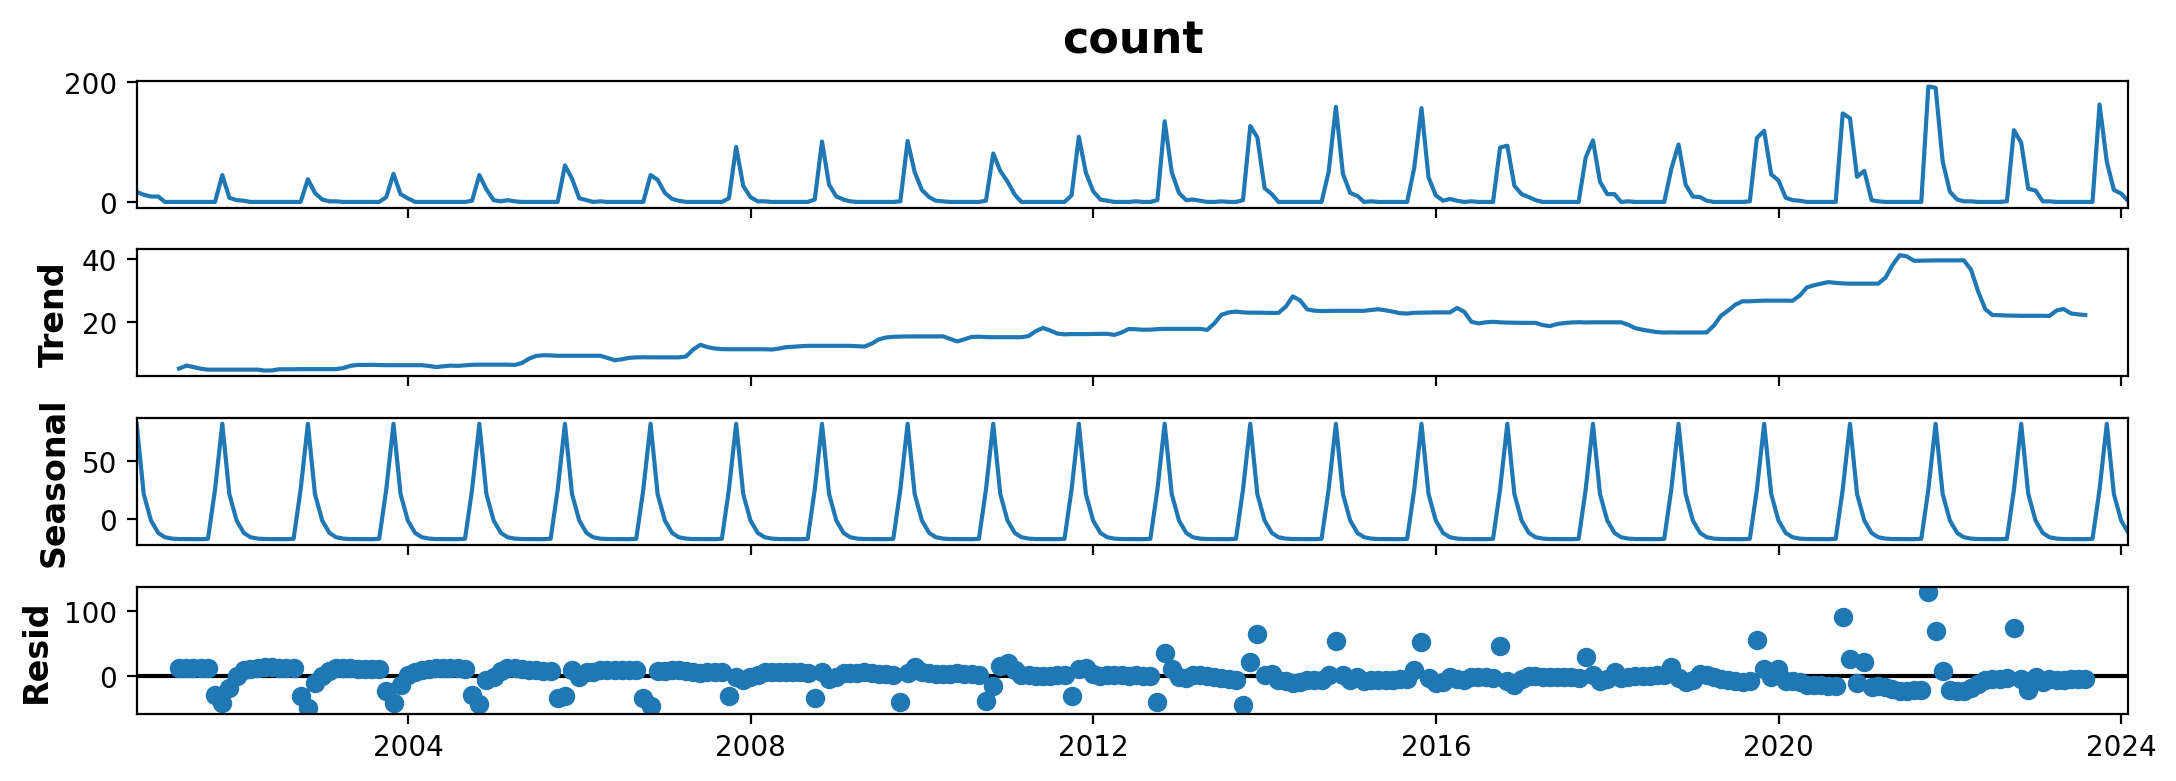

In [33]:
# Additive Decomposition (y = Trend + Seasonal + Residuals)
result_add = seasonal_decompose(df['count'], model='additive')
result_add.plot();

<Axes: xlabel='date'>

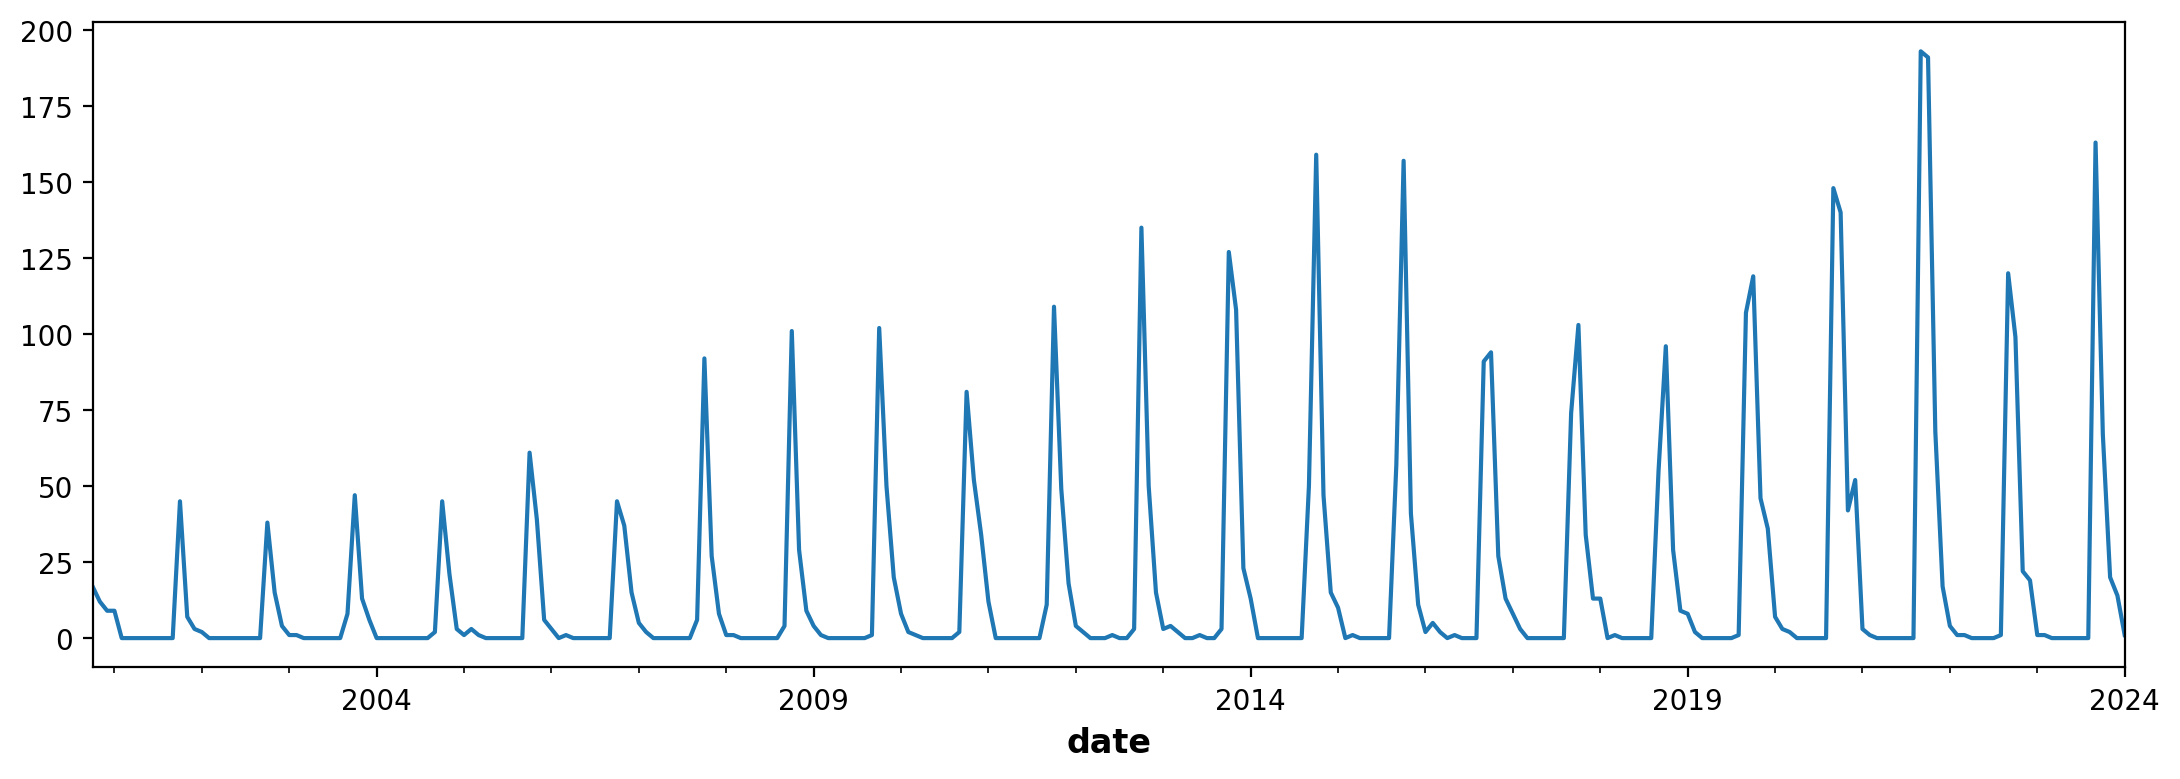

In [34]:
df['count'].plot()

In [35]:
# Use rolling mean to smooth our data (decompose uses a filter for trend)
df["trend"] = df["count"].rolling(12).mean()
df["trend"].fillna(method='bfill', inplace=True)

# Divide our original 'count' by the monthly mean
df["trend_stripped"] = df["count"] / df["trend"]

# Group the remainder by month and take the mean for each month
monthly_means = df.groupby(df.index.month)[["trend_stripped"]].mean().reset_index()
monthly_means.columns = ["month", "monthly_count"]

# Add these counts back onto our original DataFrame
df["month"] = df.index.month
joined = df.reset_index().merge(monthly_means, on = "month")

# Divide our counts one more time by our monthly component
joined["residuals"] = joined["trend_stripped"] / joined["monthly_count"]
joined.set_index("date", inplace = True)

/var/folders/0l/kzz8m3n52cs0d9lhcjh_yxqm0000gn/T/ipykernel_26333/966928551.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["trend"].fillna(method='bfill', inplace=True)


<Axes: xlabel='date'>

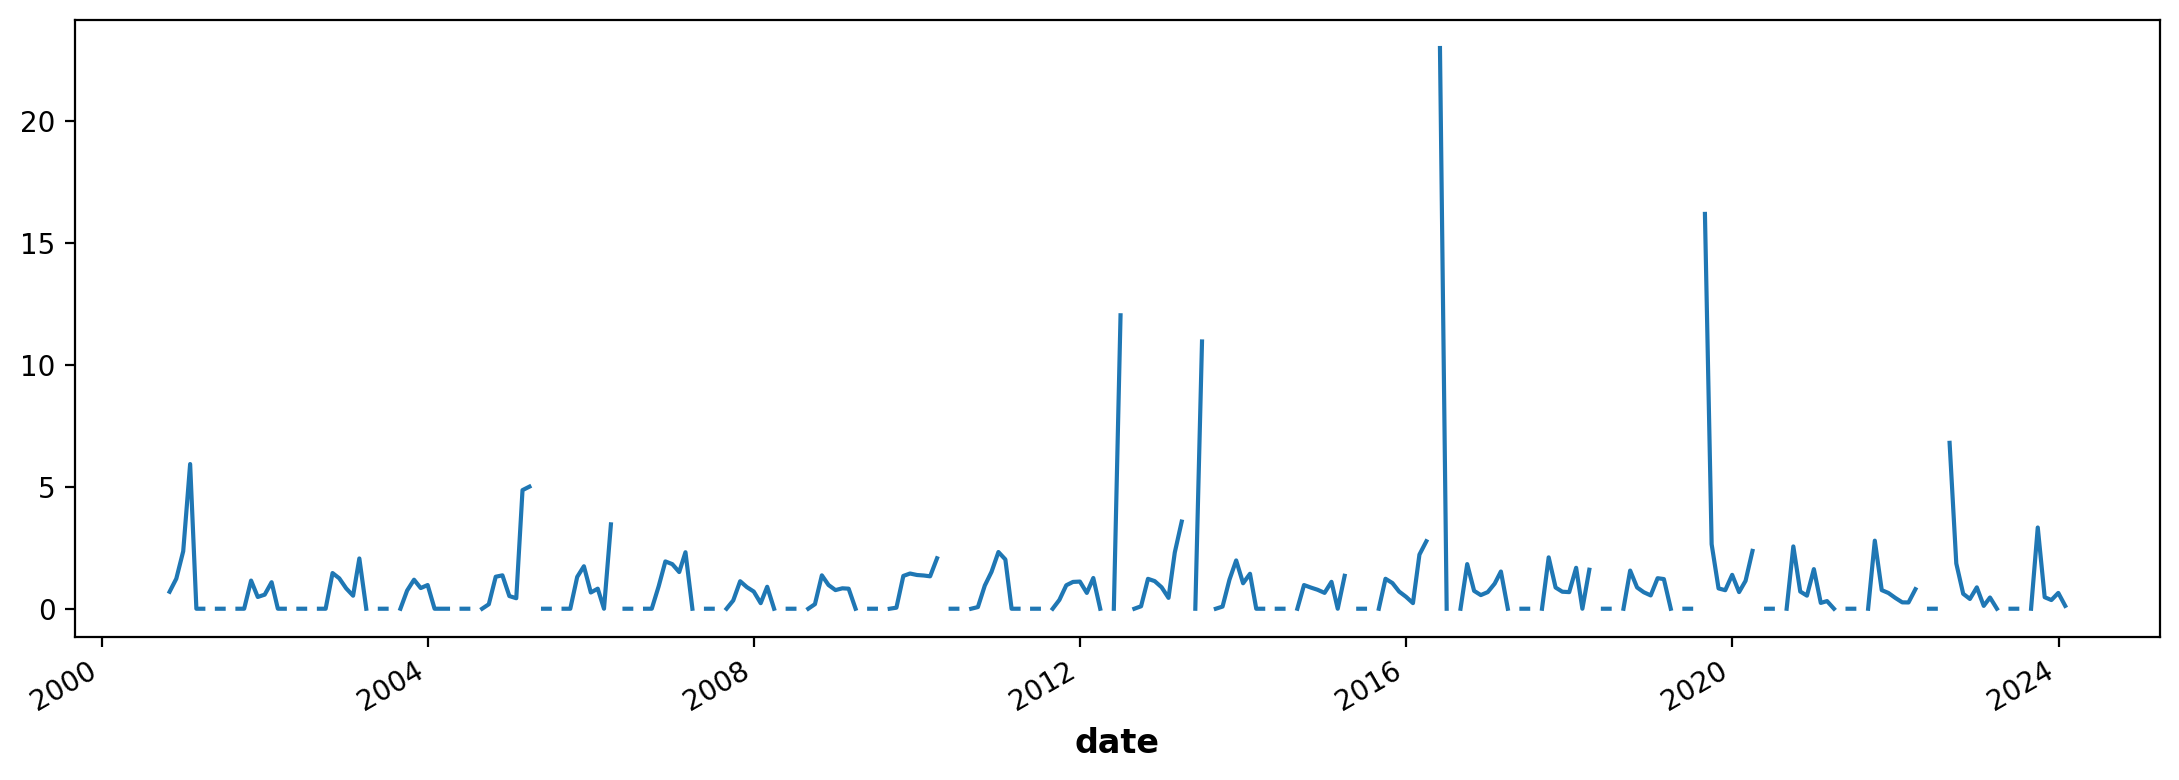

In [36]:
joined["residuals"].plot()

NameError: name 'result_mul' is not defined

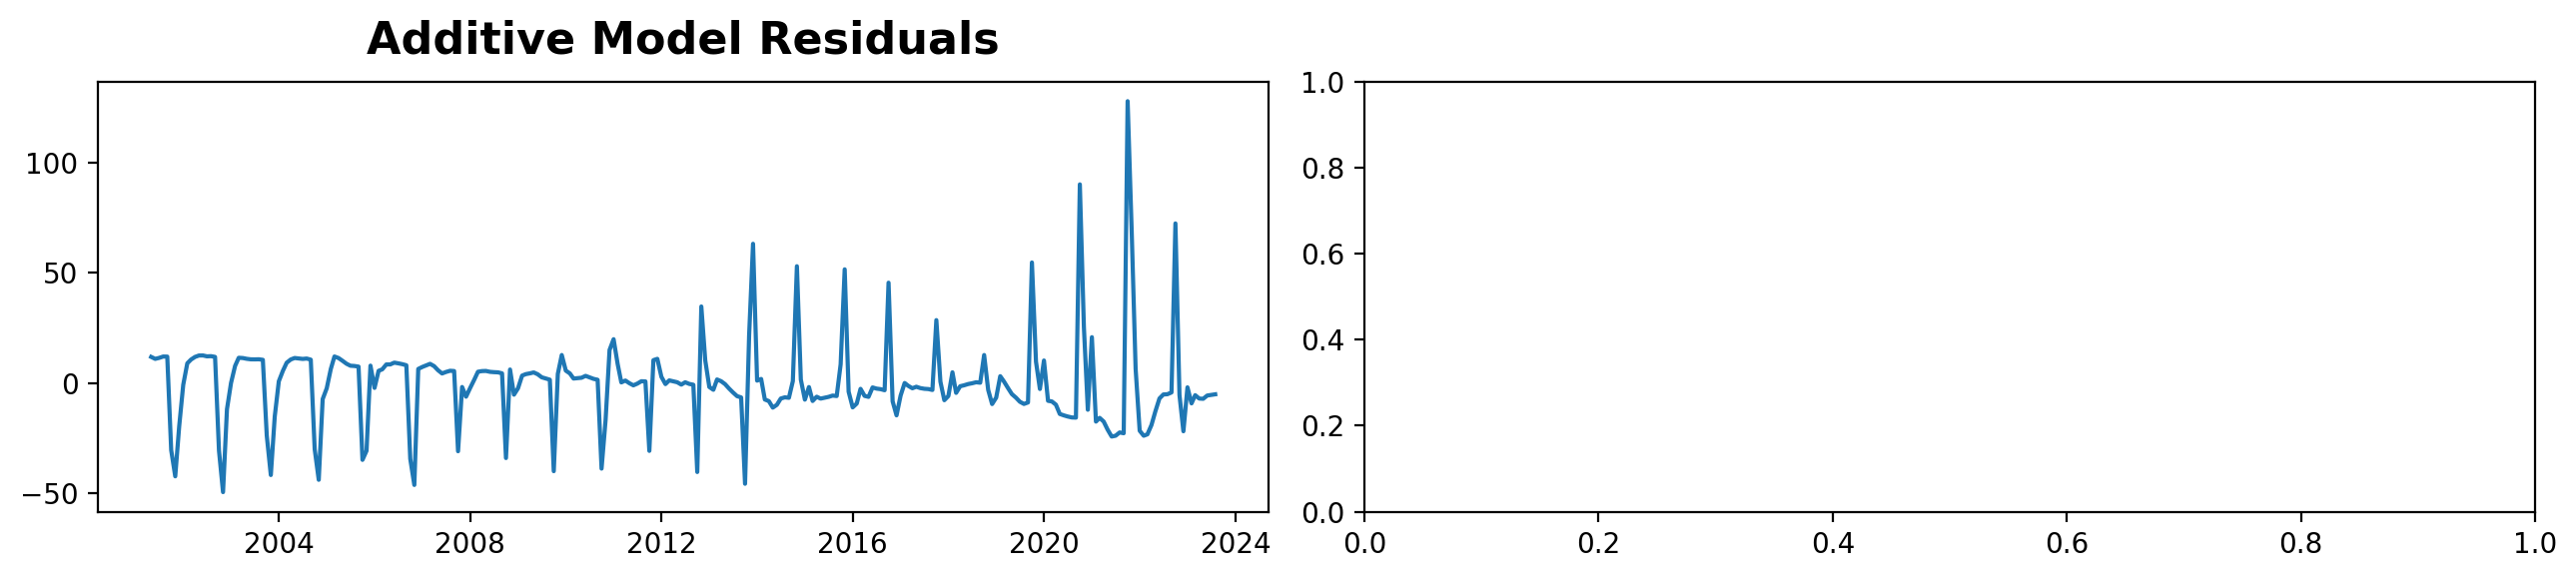

In [37]:
# Plot the residuals with "result_add.resid" to decide
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,3))
ax1.plot(result_add.resid); ax1.set_title("Additive Model Residuals")
ax2.plot(result_mul.resid); ax2.set_title("Multiplicative Model Residuals");

In [38]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['count'])[1]  # p-value

0.496885865137837

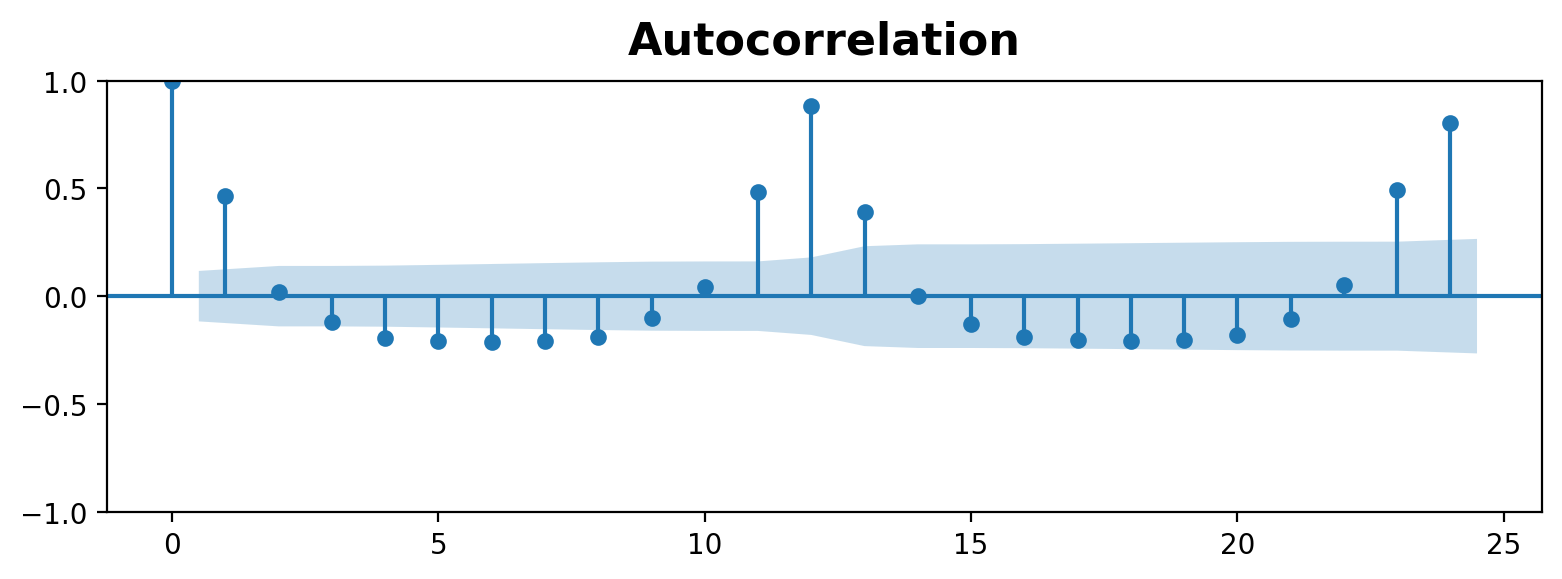

In [39]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 1, figsize=(8, 3))

# Assuming 'count' is the name of your column
plot_acf(df['count'], lags=24, ax=ax)

plt.show()


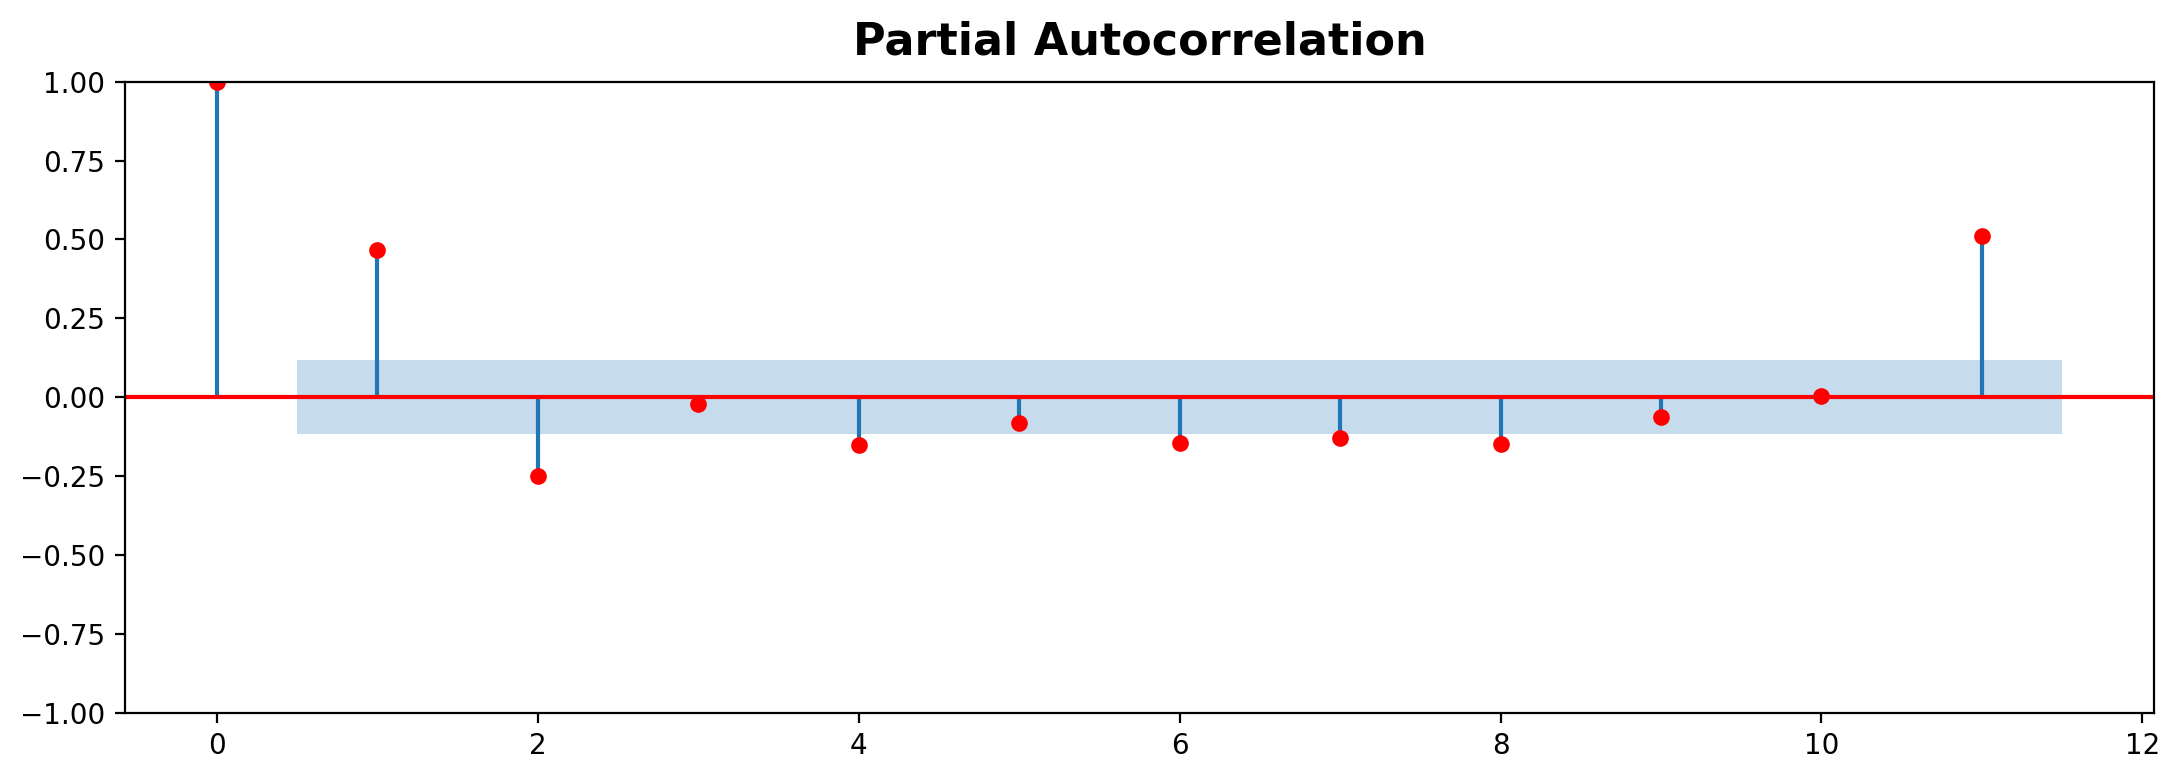

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['count'], lags=11, c='r');

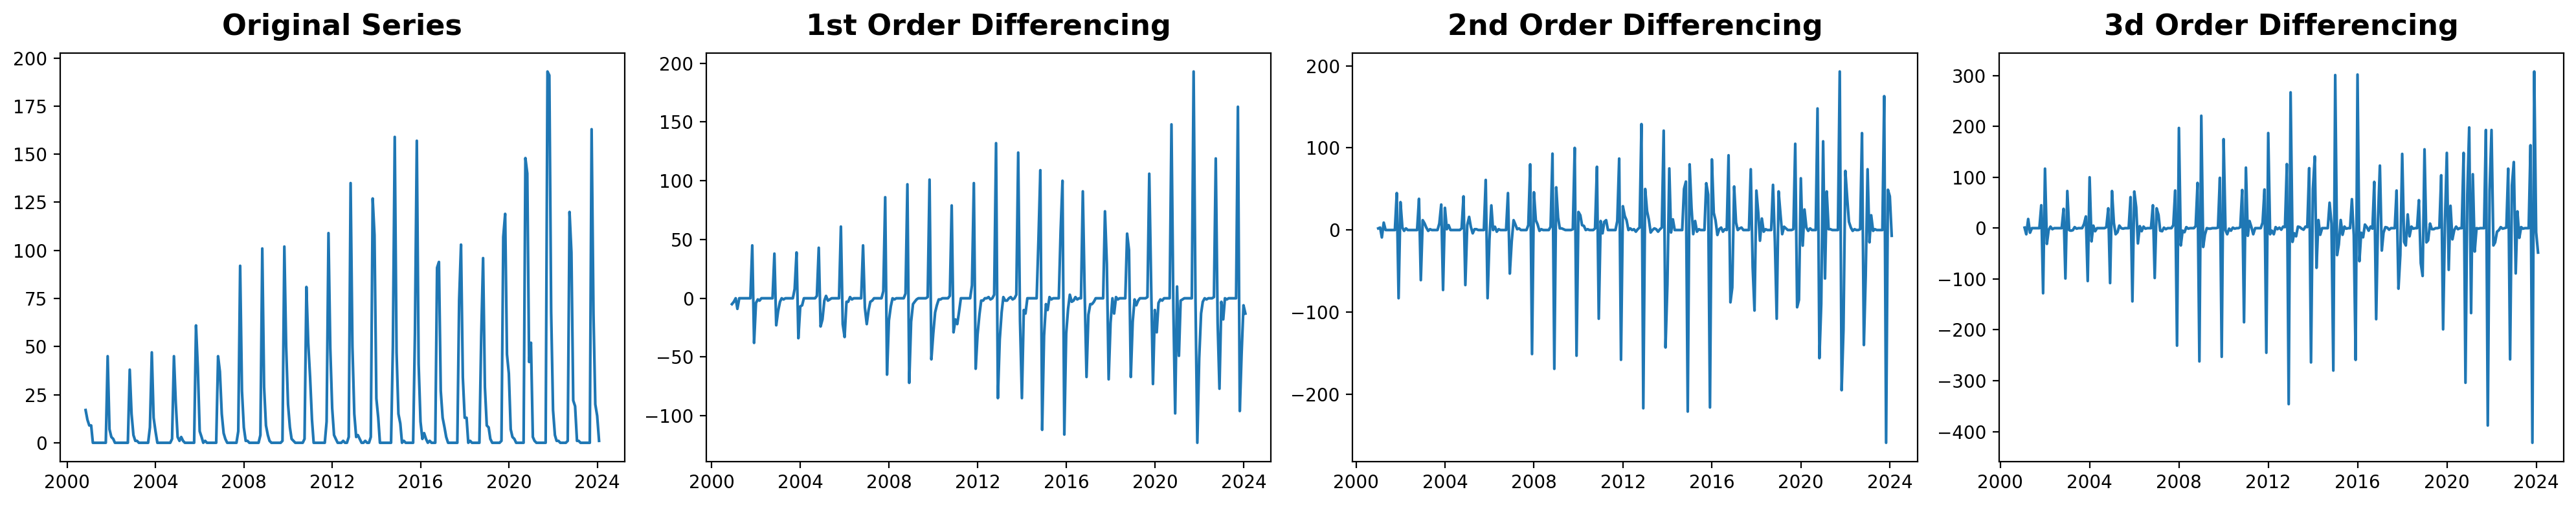

In [41]:
zero_diff = df['count']
first_order_diff = df['count'].diff(1)
second_order_diff = df['count'].diff(1).diff(1)
third_order_diff = df['count'].diff(1).diff(1).diff(1)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4))
ax1.plot(zero_diff); ax1.set_title('Original Series')
ax2.plot(first_order_diff); ax2.set_title('1st Order Differencing')
ax3.plot(second_order_diff); ax3.set_title('2nd Order Differencing');
ax4.plot(third_order_diff); ax4.set_title('3d Order Differencing');

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['count'] += 100
decomposition = seasonal_decompose(df['count'], model='multiplicative', period=12)
result_mul = decomposition

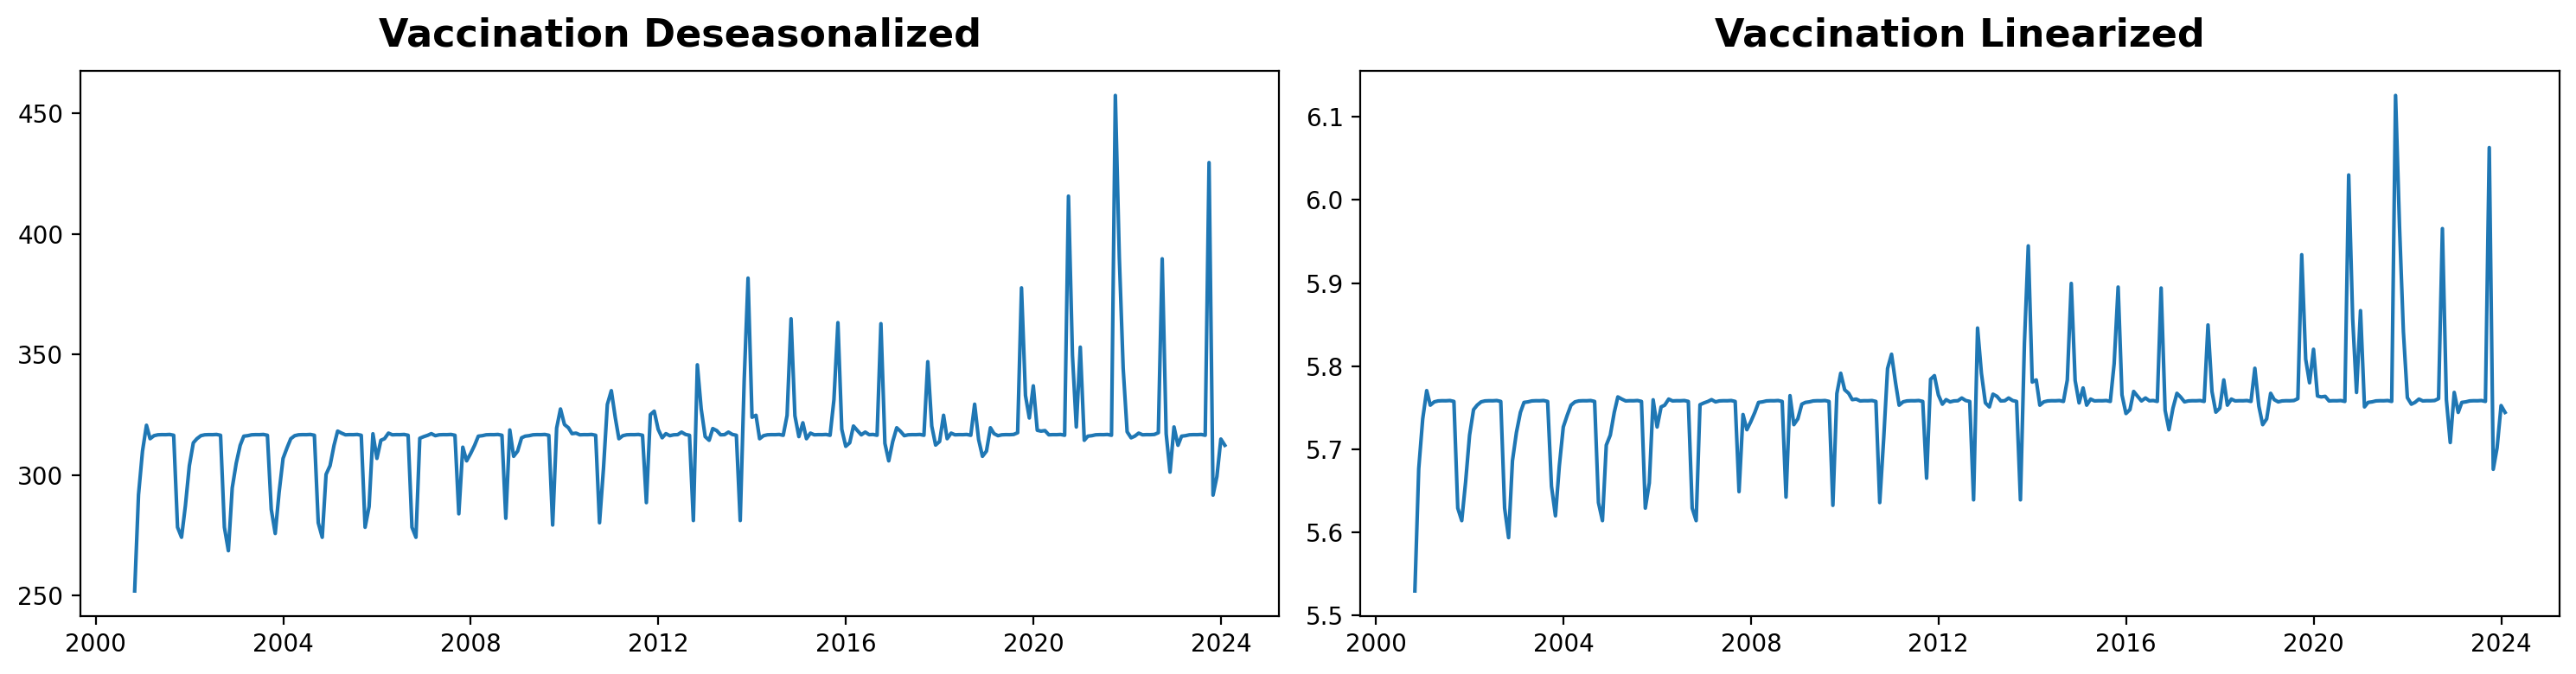

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Check if the 'count' column and the seasonal component exist and have the same length
if 'count' in df.columns and hasattr(result_mul, 'seasonal') and len(df['count']) == len(result_mul.seasonal):
    # Deseasonalize
    df['deseasonalized'] = df['count'].values / result_mul.seasonal

    # Check for negative or zero counts before applying log
    if all(df['deseasonalized'] > 0):
        # Remove exponential trend
        df['linearized'] = np.log(df['deseasonalized'])

        # Plotting
        plt.figure(figsize=(15,4))

        plt.subplot(1, 2, 1)
        plt.plot(df['deseasonalized'])
        plt.title('Vaccination Deseasonalized', fontsize=16)

        plt.subplot(1, 2, 2)
        plt.plot(df['linearized'])
        plt.title('Vaccination Linearized', fontsize=16)

        plt.show()
    else:
        print("Error: Deseasonalized data contains non-positive values, can't apply log")
else:
    print("Error: Check 'value' column and seasonal component")


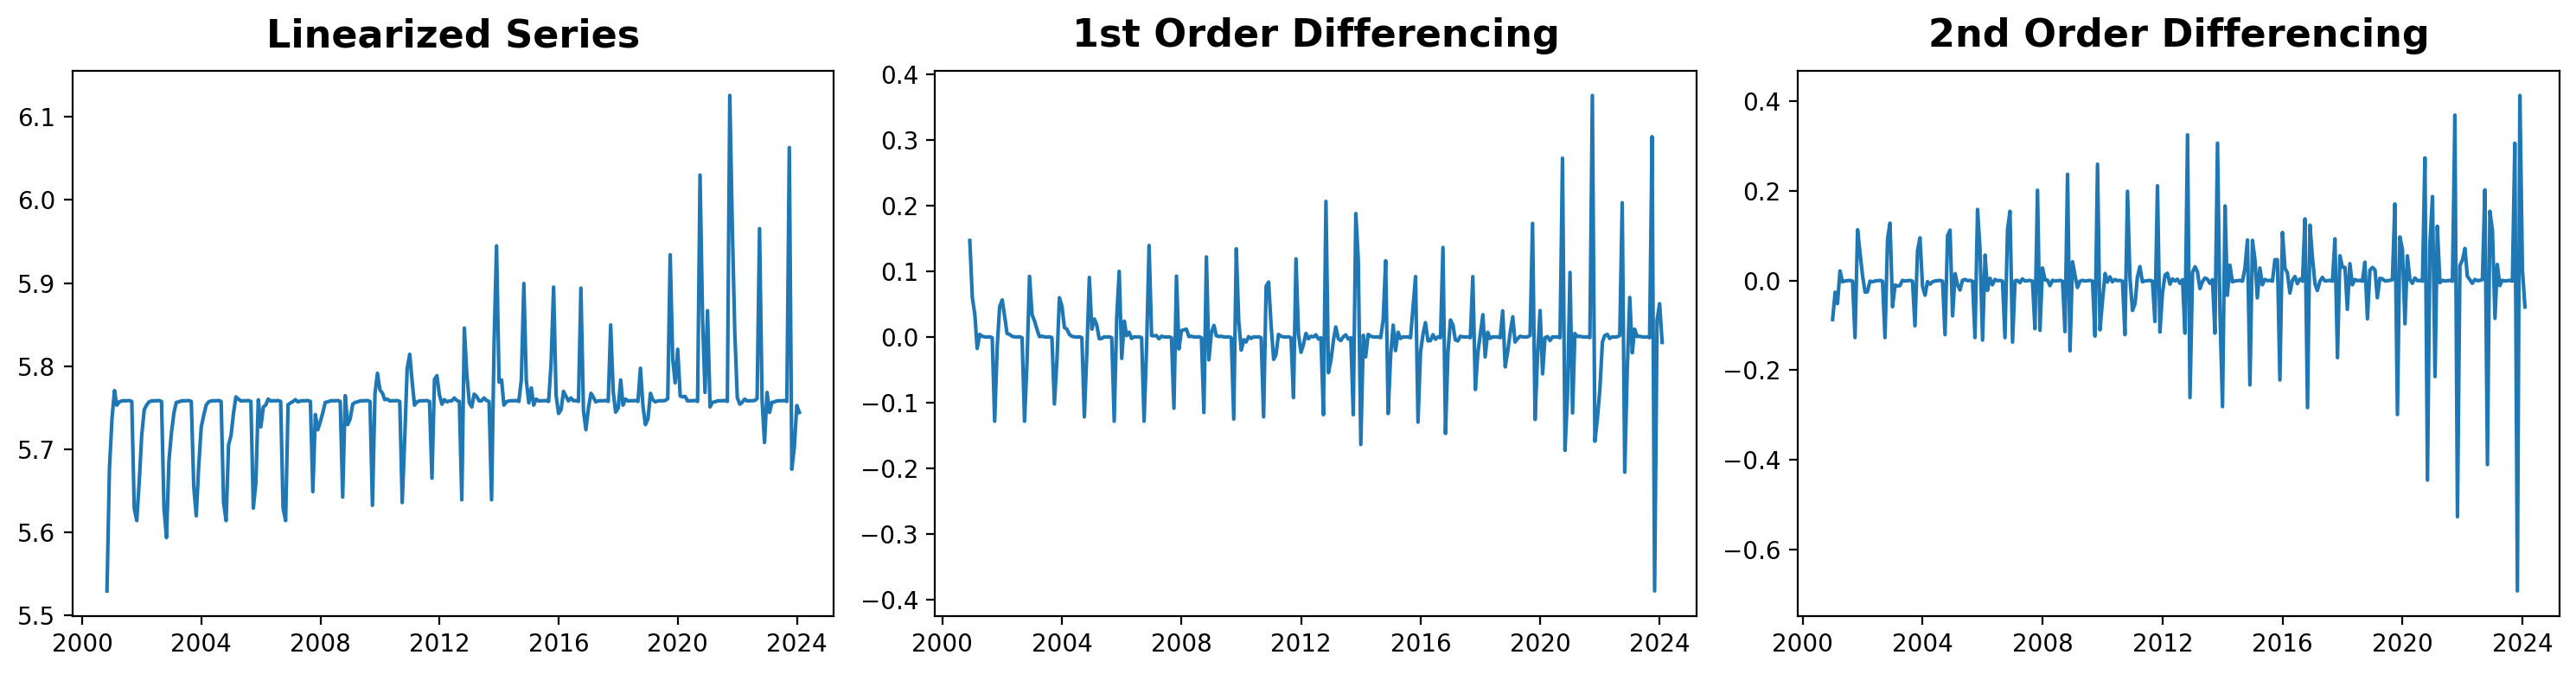

In [53]:
# Let's difference this and look at the ACFs
fig, axes = plt.subplots(1, 3,figsize=(15,4))

axes[0].plot(df['linearized']); axes[0].set_title('Linearized Series')
# 1st Differencing
y_diff = df['linearized'].diff().dropna()
axes[1].plot(y_diff); axes[1].set_title('1st Order Differencing')

# 2nd Differencing
y_diff_diff = df['linearized'].diff().diff().dropna()
axes[2].plot(y_diff_diff); axes[2].set_title('2nd Order Differencing');

In [54]:
# check with ADF Test for stationarity
print('p-value zero-diff: ', adfuller(df['linearized'])[1])
print('p-value first-diff: ', adfuller(df['linearized'].diff().dropna())[1])
print('p-value second-diff: ', adfuller(df['linearized'].diff().diff().dropna())[1])

p-value zero-diff:  0.5329492180212614
p-value first-diff:  8.620269370946758e-20
p-value second-diff:  1.0927901516817972e-17


In [55]:
from pmdarima.arima.utils import ndiffs

# automatically estimate differencing term
from pmdarima.arima.utils import ndiffs
ndiffs(df['linearized'])

1

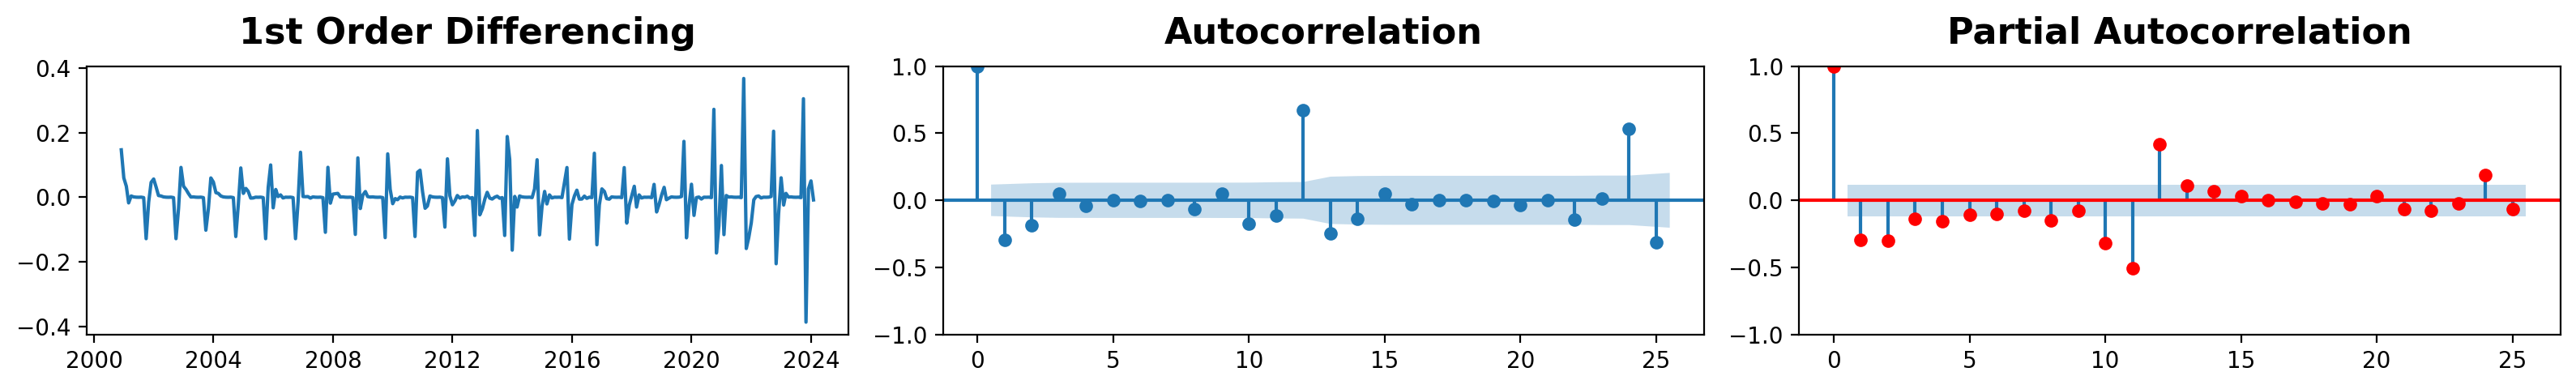

In [56]:
# ACF / PACF analysis of y_diff linearized
fig, axes = plt.subplots(1,3, figsize=(16,2.5))
axes[0].plot(y_diff); axes[0].set_title('1st Order Differencing')
plot_acf(y_diff, ax=axes[1]);
plot_pacf(y_diff, ax=axes[2], c='r');

In [63]:
# from statsmodels.tsa.arima_model import ARIMA #statsmodels 0.11
from statsmodels.tsa.arima.model import ARIMA  #statsmodels 0.12+

arima = ARIMA(df['linearized'], order=(0, 1, 2), trend='t')
arima = arima.fit()

/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

In [64]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             linearized   No. Observations:                  280
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 416.524
Date:                Mon, 08 Jan 2024   AIC                           -825.047
Time:                        19:28:31   BIC                           -810.522
Sample:                    10-31-2000   HQIC                          -819.221
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0003   8.22e-05      3.311      0.001       0.000       0.000
ma.L1         -0.7134      0.186     -3.828      0.000      -1.079      -0.348
ma.L2         -0.2850      0.081     -3.506      0.000      -0.444      -0.126
sigma2         0.0029      0.001      5.093      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1326.13
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.45   Skew:                             1.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
import pmdarima as pm
smodel = pm.auto_arima(df['linearized'],
                       start_p=1, max_p=2,
                       start_q=1, max_q=2,
                       trend='t',
                       seasonal=False,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-778.407, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-700.404, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-724.387, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-752.531, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-700.404, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-764.214, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-784.692, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-794.189, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-794.189, Time=0.05 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.410 seconds


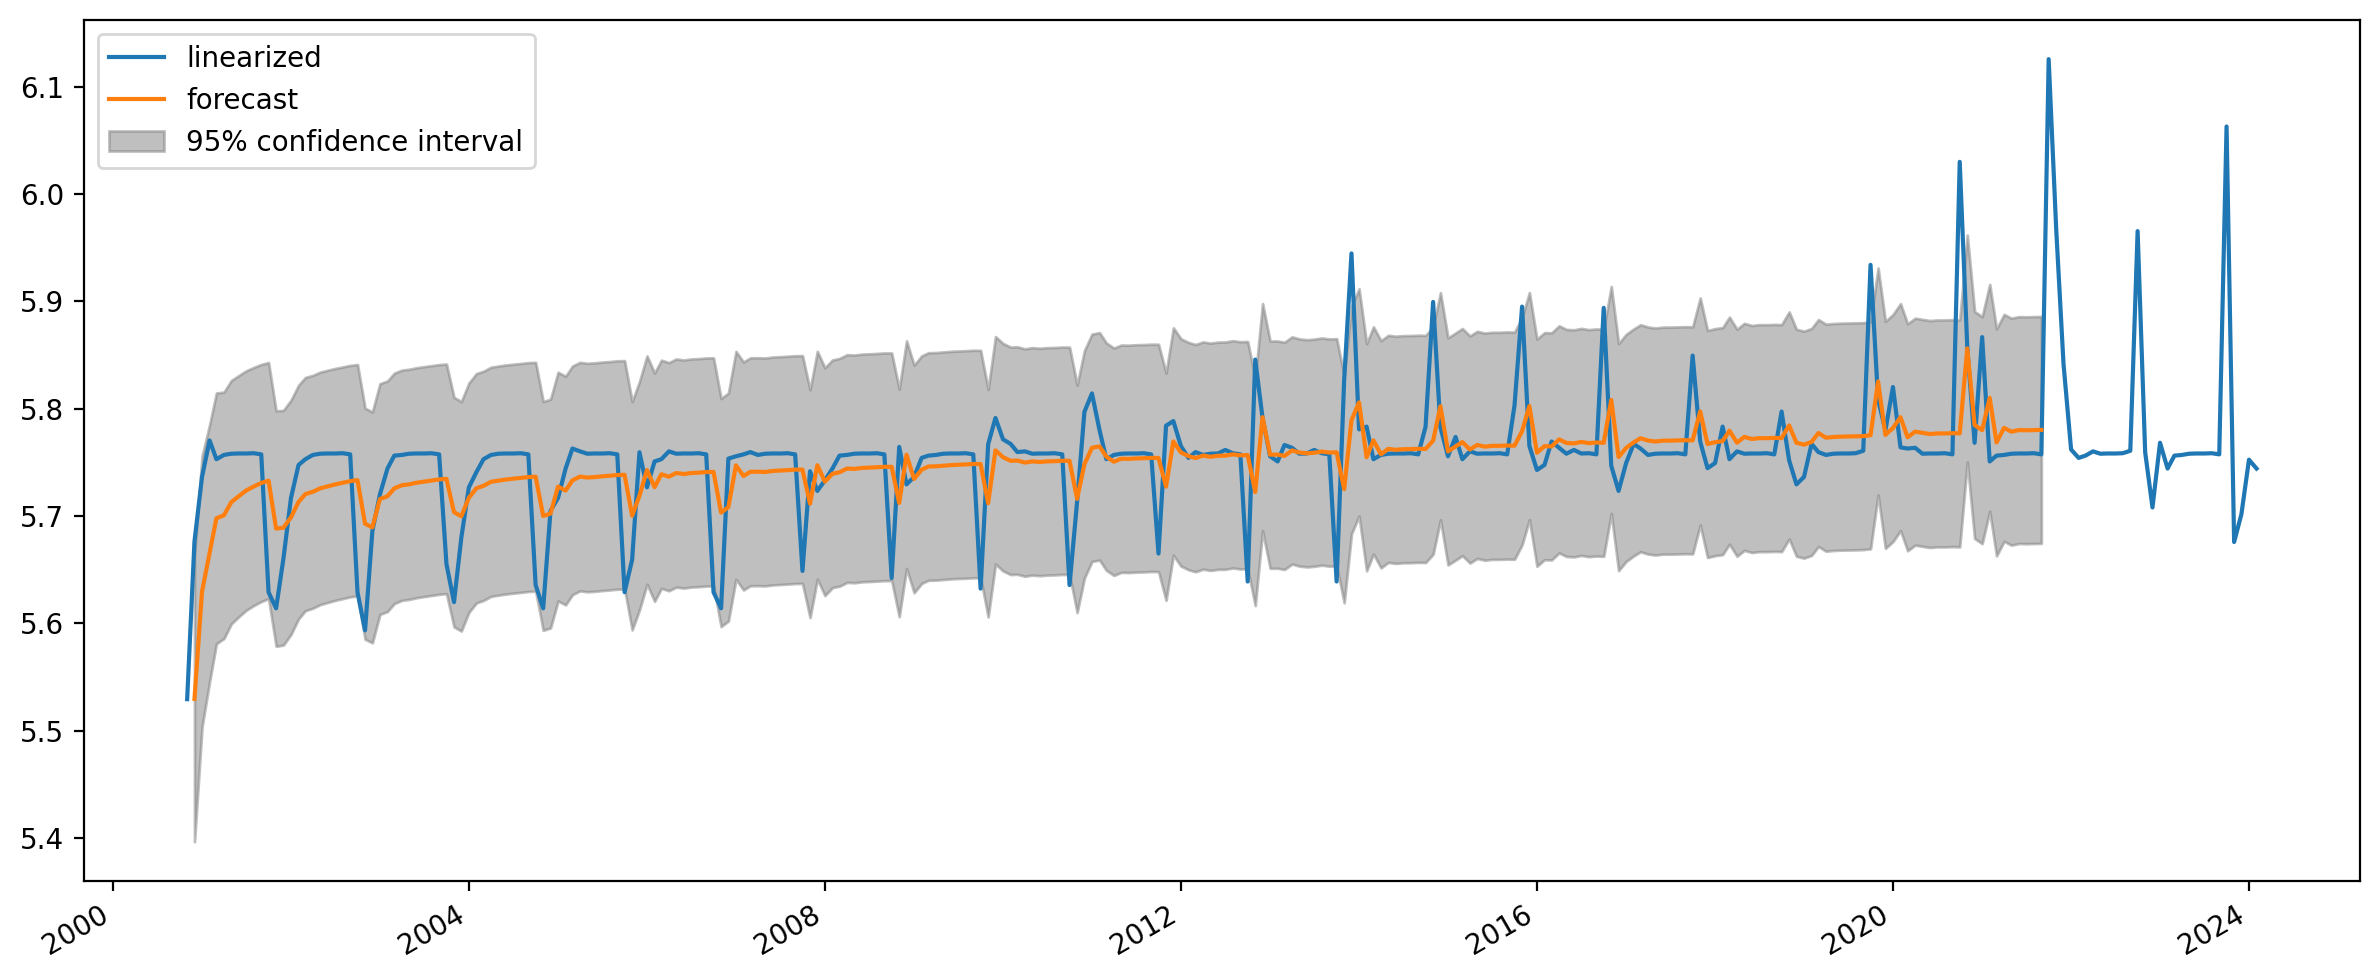

In [65]:
from statsmodels.graphics.tsaplots import plot_predict

fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.plot(df['linearized'], label='linearized')
plot_predict(arima, start=1, end=250, ax=axs);

In [77]:
# Create a correct train_test_split to predict the last 50 points
train = df['linearized'][0:24]
test = df['linearized'][24:]

# Build model
arima = ARIMA(train, order=(1, 2, 0))  
arima = arima.fit()

## Forecast
# Forecast values
forecast = arima.forecast(len(test), alpha=0.05)  # 95% confidence

# Forecast values and confidence intervals
forecast_results = arima.get_forecast(len(test), alpha=0.05)
forecast = forecast_results.predicted_mean
confidence_int = forecast_results.conf_int().values

/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/janduplessis/.pyenv/versions/3.10.6/envs/vaccine/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError begi

In [78]:
# We define here a "Plot forecast vs. real", which also shows historical training set

def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

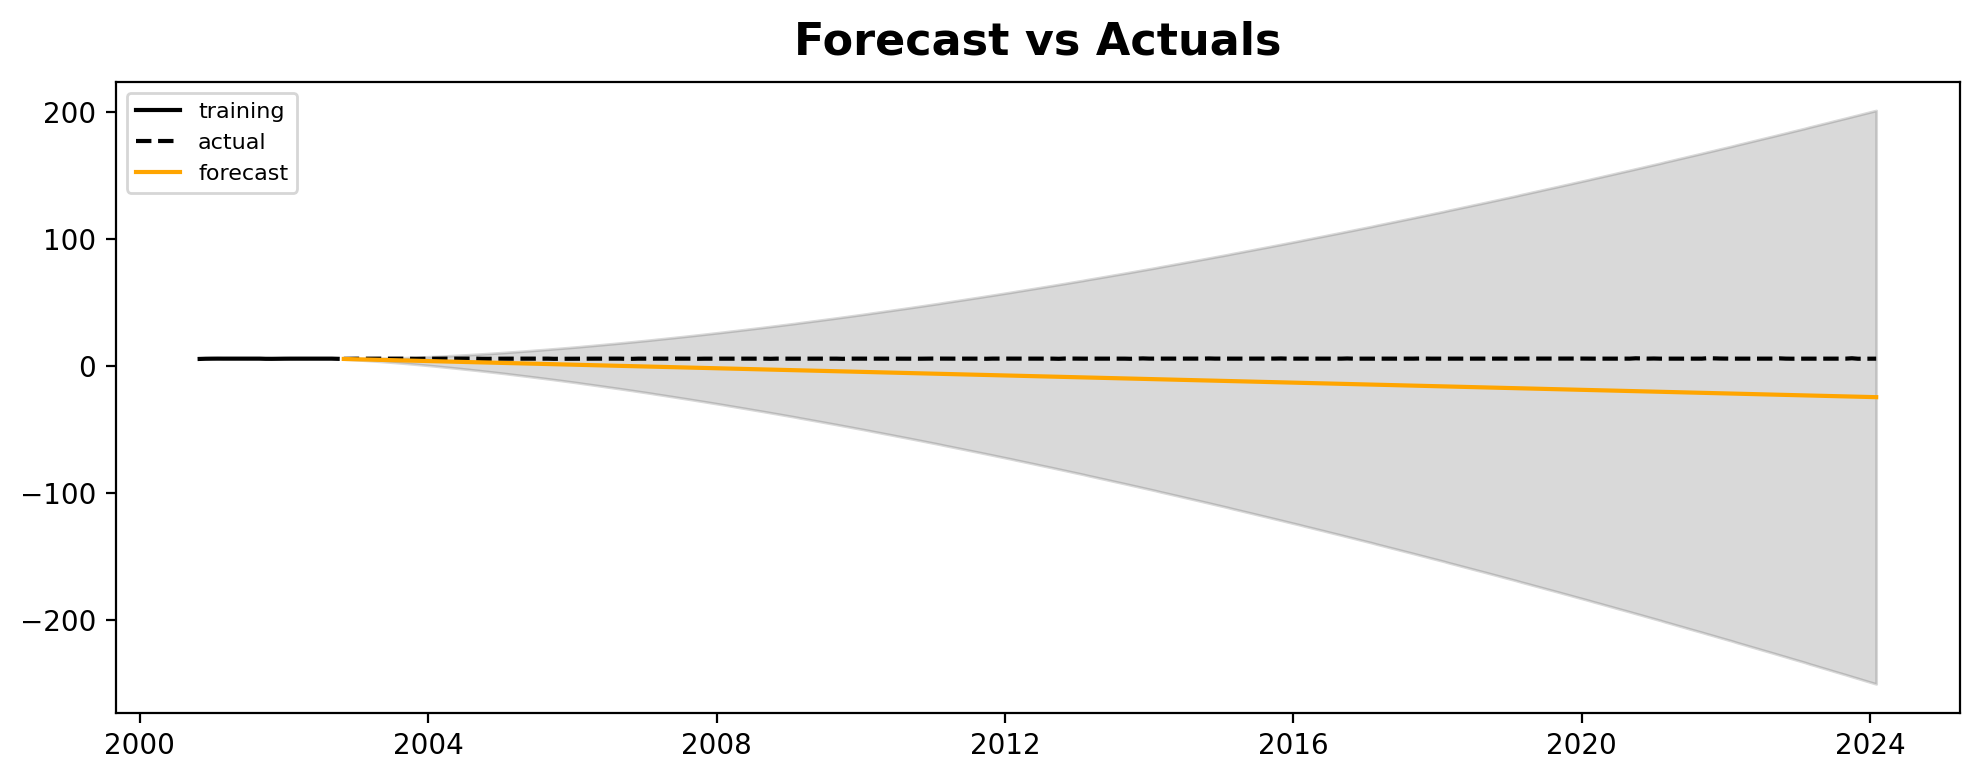

In [79]:
plot_forecast(forecast, train, test, confidence_int[:,0], confidence_int[:,1])

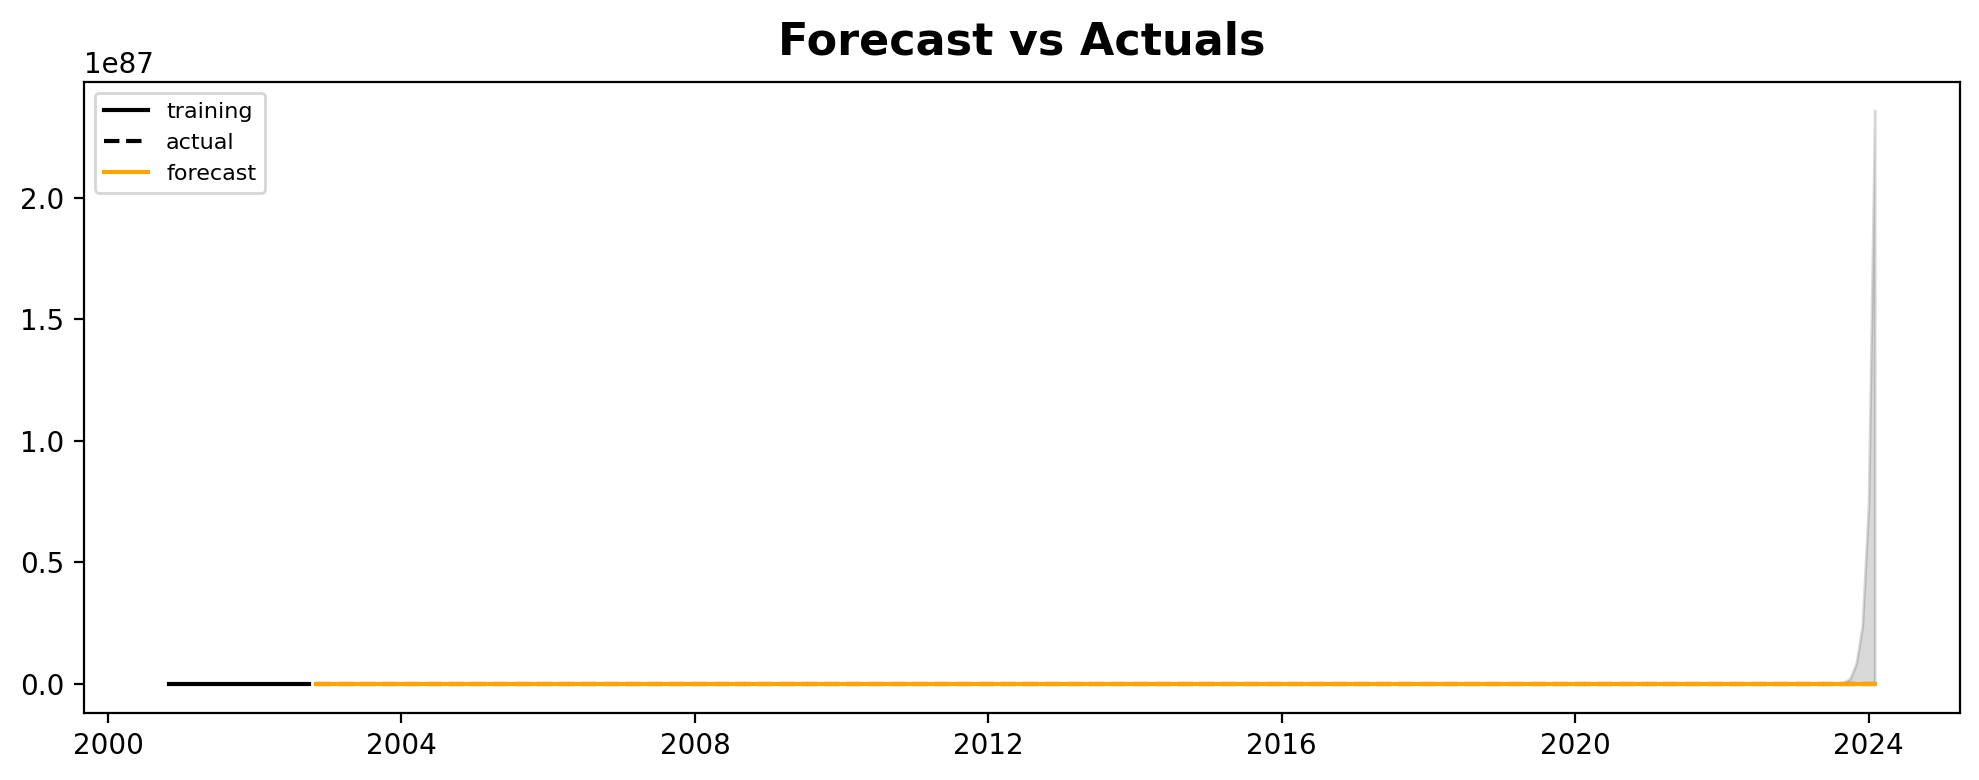

In [80]:
# Re-compose back to initial TS

forecast_recons = np.exp(forecast) * result_mul.seasonal[24:]
train_recons = np.exp(train) * result_mul.seasonal[0:24]
test_recons = np.exp(test) * result_mul.seasonal[24:]
lower_recons = np.exp(confidence_int)[:, 0] * result_mul.seasonal[24:]
upper_recons = np.exp(confidence_int)[:, 1] * result_mul.seasonal[24:]

# Plot
plot_forecast(forecast_recons, train_recons, test_recons, lower_recons.values, upper_recons.values)

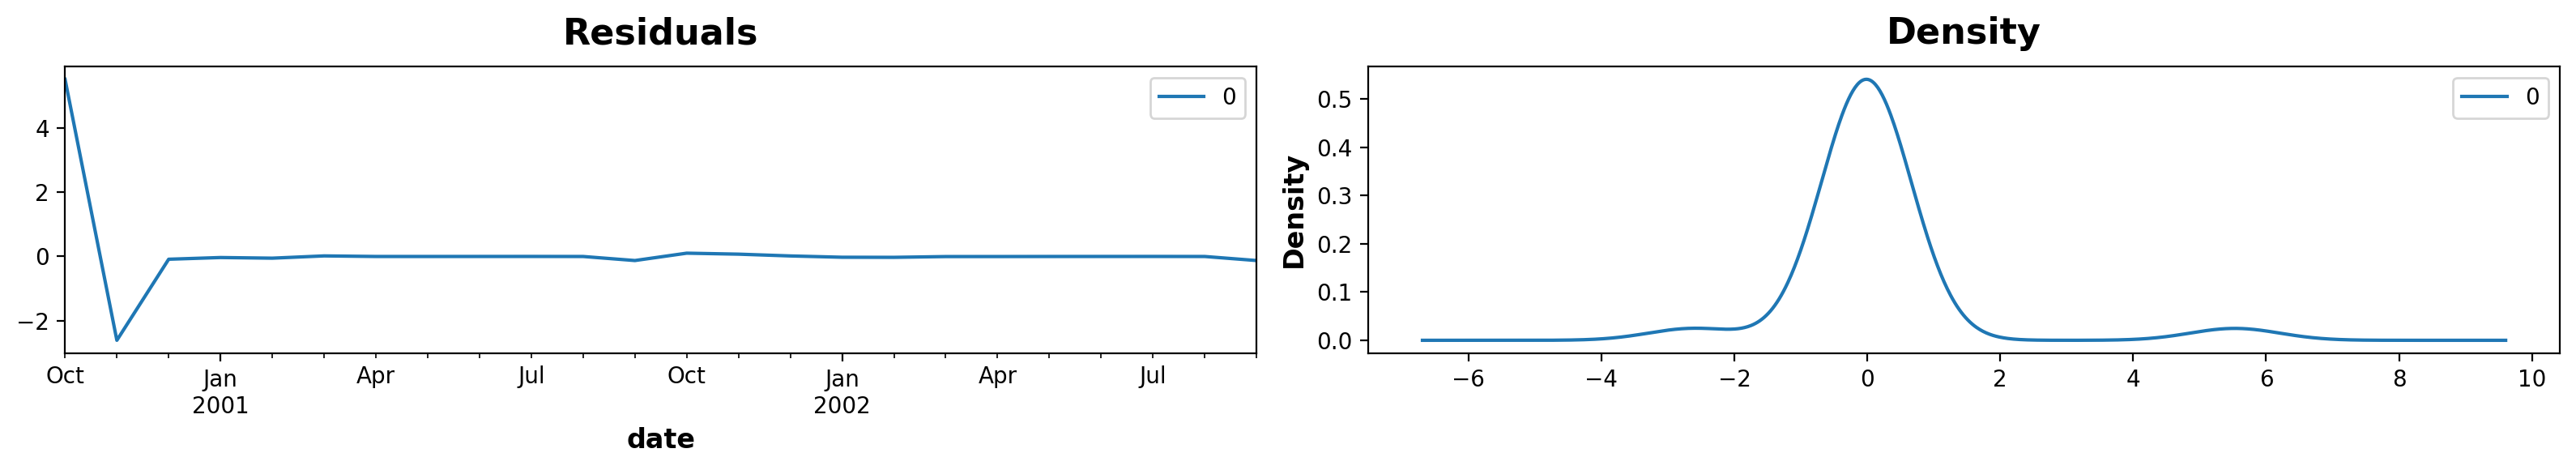

In [81]:
residuals = pd.DataFrame(arima.resid)

fig, ax = plt.subplots(1,2, figsize=(16,3))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]);